# Mouse hindbrain (oligo)

In [1]:
import math
import scanpy as sc
import scvelo as scv
import matplotlib.pyplot as plt

import sys
sys.path.append("..")
from tivelo.main import tivelo
from baseline import run_baseline

(Running UniTVelo 0.2.5.2)
2025-04-05 05:01:46


2025-04-05 13:01:47.147124: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Run TIVelo
Load the dataset. Set the data name with key for cluster, key for embedding and cluster edges (for comparison).

In [2]:
data_name = "hindbrain"
data_path = "/lustre/project/Stat/s1155184322/datasets/velocity/oligo_lite_processed.h5ad"
adata = sc.read(data_path)

group_key = "celltype"
emb_key = "X_umap"
cluster_edges = [('COPs', 'NFOLs'), ('NFOLs', 'MFOLs')]

Set the model parameters.

In [3]:
save_folder = "results"
show_fig = True
filter_genes = True
save_coeff = True
constrain = True
loss_fun = "mse"
only_s = False
alpha_1 = 1
alpha_2 = 0.1
batch_size = 1024
n_epochs = 100

tree_gene = None
show_DTI = False
adjust_DTI = False
velocity_key = "velocity"
measure_performance = True

Run the model by function tivelo.

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 20/20 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:00:13) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing terminal states
    identified 3 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
'path_dict' added to adata.uns


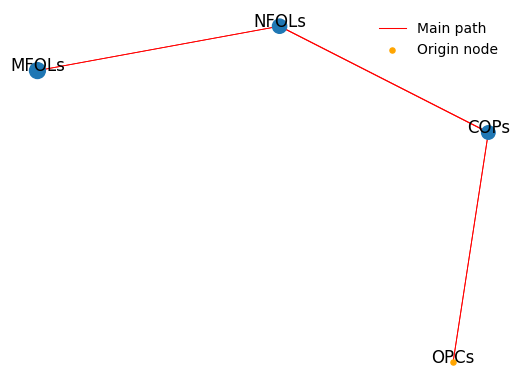


main path: ['OPCs', 'COPs', 'NFOLs', 'MFOLs']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 122 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 181 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:   56.6s
[Parallel(n_jobs=-1)]: Done 225 tasks      | elapsed:  

mean: 48.319 
median: 23.684 
lower quantile: -3.802 
upper quantile: 77.022 
minimum: -322.533 
maximum: 634.429 
No. of positive scores: 436

'path_dict' added to adata.uns
'child_dict' added to adata.uns
'level_dict' added to adata.uns
'threshold_list' added to adata.uns
'd_nn' added to adata.obsp


Model training: 100%|██████████| 100/100 [00:55<00:00,  1.79it/s, cos_s=0.366, cos_u=0.508, mse_s=0.001, mse_u=0.003]


computing velocity graph (using 20/20 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


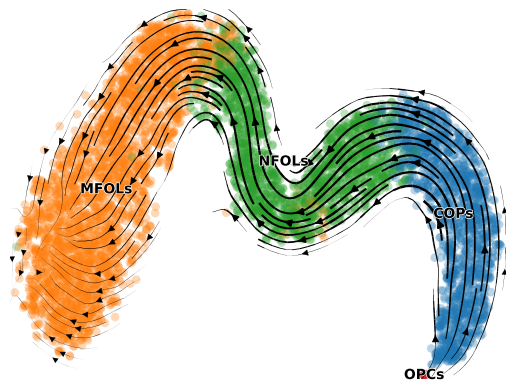

TIVelo:
 CBDir: 0.6034 ICVCoh: 0.4990 
 CBDir2: 0.4541 ICVCoh2: 0.6679 
 TransProbs: 0.6182 VeloCoh: 0.5055


In [4]:
adata_ = tivelo(adata, group_key, emb_key, data_name=data_name, save_folder=save_folder, njobs=-1, tree_gene=tree_gene,
                show_fig=show_fig, filter_genes=filter_genes, constrain=constrain, loss_fun=loss_fun, only_s=only_s,
                alpha_1=alpha_1, alpha_2=alpha_2, batch_size=batch_size, n_epochs=n_epochs, velocity_key="velocity",
                adjust_DTI=adjust_DTI, show_DTI=show_DTI, cluster_edges=cluster_edges,
                measure_performance=measure_performance)

## Run scVelo
Stochastic mode.

computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


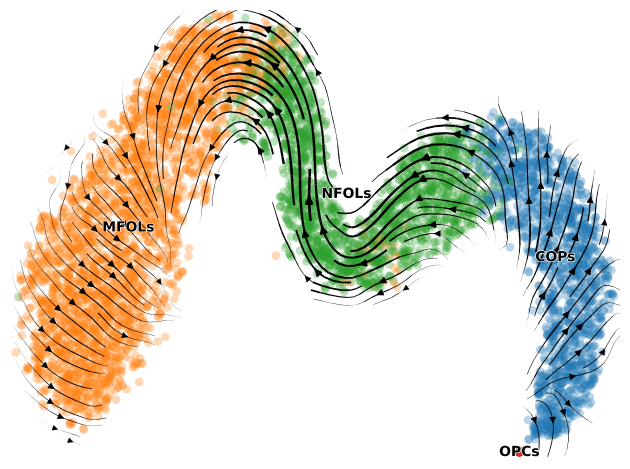

scvelo:
 CBDir: 0.3405 ICVCoh: 0.8961 
 CBDir2: 0.1335 ICVCoh2: 0.7693 
 TransProbs: 0.2113 VeloCoh: -0.1468


In [5]:
adata_scvelo = run_baseline(adata, "scvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

Dynamical mode.

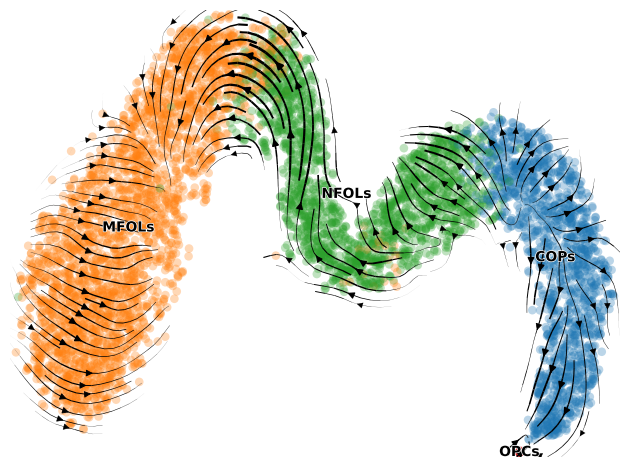

scvelo2:
 CBDir: 0.0741 ICVCoh: 0.9175 
 CBDir2: 0.0591 ICVCoh2: 0.6399 
 TransProbs: 0.4563 VeloCoh: -0.2701


In [6]:
adata_scvelo2 = run_baseline(adata, "scvelo2", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run veloVI.

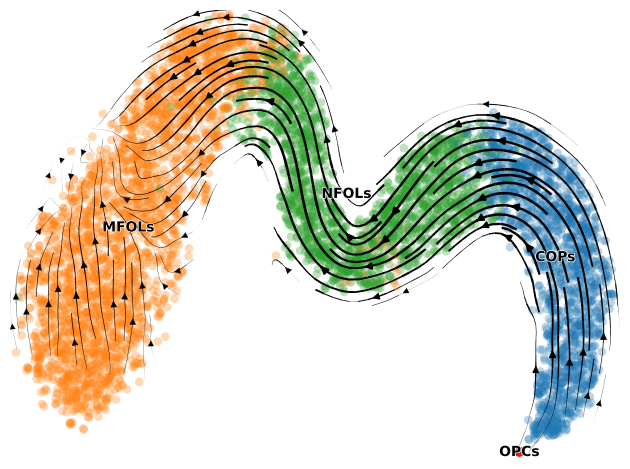

velovi:
 CBDir: 0.6054 ICVCoh: 0.9151 
 CBDir2: 0.0988 ICVCoh2: 0.6947 
 TransProbs: 0.1110 VeloCoh: 0.1134


In [7]:
adata_velovi = run_baseline(adata, "velovi", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                            measure_performance=True)

## Run UniTVelo.

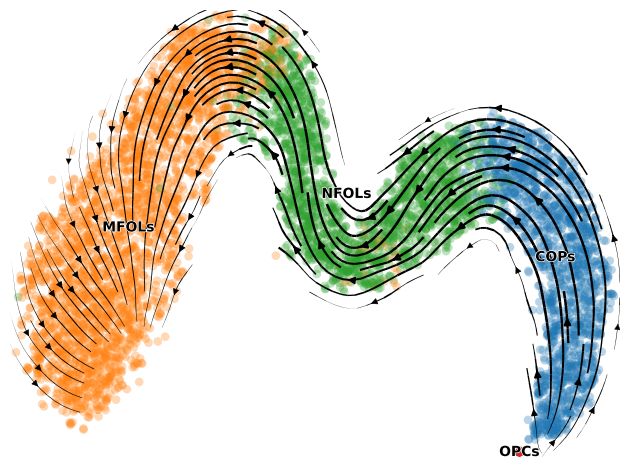

unitvelo:
 CBDir: 0.6050 ICVCoh: 0.9968 
 CBDir2: 0.1570 ICVCoh2: 0.9031 
 TransProbs: 0.3077 VeloCoh: -0.0474


In [8]:
adata_unitvelo = run_baseline(adata, "unitvelo", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                              measure_performance=True)

## Run cellDancer

We don't directly run cellDancer here since the environment required by cellDancer may conflict that of TIVelo. We recommend running cellDancer in an independent environment.

computing velocity graph (using 20/20 cores)


  0%|          | 0/6253 [00:00<?, ?cells/s]

    finished (0:00:02) --> added 
    'velocity_S_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_S_umap', embedded velocity vectors (adata.obsm)


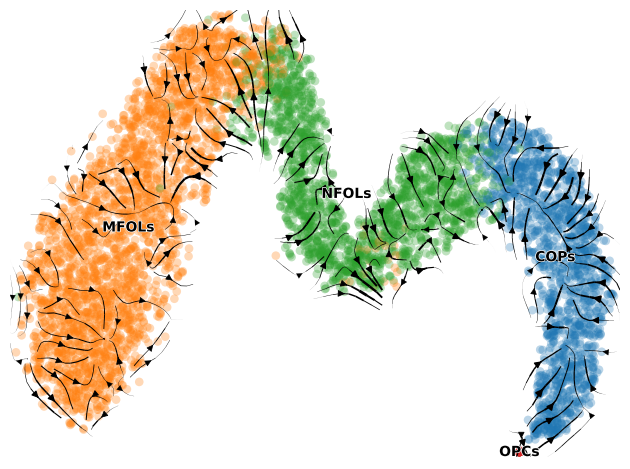

celldancer:
 CBDir: -0.0295 ICVCoh: 0.9958 
 CBDir2: 0.4664 ICVCoh2: 0.3626 
 TransProbs: 0.0007 VeloCoh: -0.0689


In [9]:
adata_celldancer = run_baseline(adata, "celldancer", data_name, group_key, emb_key, cluster_edges, show_fig=True,
                                measure_performance=True)

## Run DeepVelo

We don't directly run DeepVelo here since the environment required by DeepVelo may conflict that of TIVelo. We recommend running DeepVelo in an independent environment.

In [3]:
adata_deepvelo = sc.read("/users/s1155184322/projects/tutorial/DeepVelo/results/hindbrain_deepvelo.h5ad")
velocity_key = "velocity"

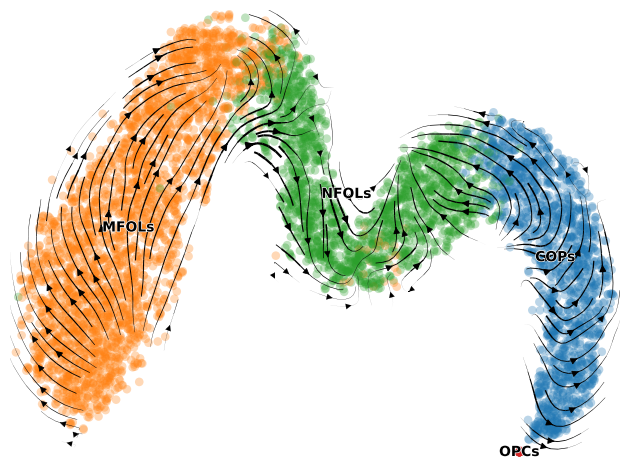

In [4]:
ax = scv.pl.velocity_embedding_stream(adata_deepvelo, vkey=velocity_key, color=group_key, title="", show=False)
plt.tight_layout()

In [5]:
from tivelo.utils.metrics import inner_cluster_coh, cross_boundary_correctness, cross_boundary_scvelo_probs, \
    cross_boundary_correctness2, inner_cluster_coh2, velo_coh
    
_, cbdir = cross_boundary_correctness(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                  cluster_edges=cluster_edges, x_emb=emb_key)
_, cbdir2 = cross_boundary_correctness2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key,
                                                    cluster_edges=cluster_edges)
_, trans_probs = cross_boundary_scvelo_probs(adata_deepvelo, cluster_key=group_key, cluster_edges=cluster_edges,
                                                         trans_g_key="{}_graph".format(velocity_key))
_, icvcoh = inner_cluster_coh(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key)
_, icvcoh2 = inner_cluster_coh2(adata_deepvelo, cluster_key=group_key, velocity_key=velocity_key, x_emb=emb_key)
velocoh = velo_coh(adata_deepvelo, velocity_key=velocity_key, trans_g_key="{}_graph".format(velocity_key))

print("DeepVelo:\n", "CBDir:", "%.4f" % cbdir, "ICVCoh:", "%.4f" % icvcoh, "\n",
      "CBDir2:", "%.4f" % cbdir2, "ICVCoh2:", "%.4f" % icvcoh2, "\n",
      "TransProbs:", "%.4f" % trans_probs, "VeloCoh:", "%.4f" % velocoh)

DeepVelo:
 CBDir: 0.2459 ICVCoh: 0.9419 
 CBDir2: -0.0161 ICVCoh2: 0.6190 
 TransProbs: 0.0386 VeloCoh: -0.0959
